In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
scaler = MinMaxScaler()

In [ ]:
df = pd.read_excel("NASDAQ Realized Volatility.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

Hyperparameter Search

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[1,3,5,7,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

In [ ]:
from numpy.random import seed
seed(1052023)
from random import randrange

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
3487/3487 [==============================] - 24s 5ms/step - loss: 0.0012 - acc: 2.8678e-04
Epoch 2/5
3487/3487 [==============================] - 17s 5ms/step - loss: 0.0011 - acc: 2.8678e-04
Epoch 3/5
3487/3487 [==============================] - 18s 5ms/step - loss: 0.0011 - acc: 2.8678e-04
Epoch 4/5
3487/3487 [==============================] - 17s 5ms/step - loss: 0.0011 - acc: 2.8678e-04
Epoch 5/5
1/1 [==============================] - 0s 26ms/step
Epoch: 5 | Inputs: 21 | Nodes: 42 | Dropout: 0.4 | Loss: huber_loss
RMSE: 0.0031489492265937206 | Accuracy: 65.82111909756638
Epoch 1/3
3445/3445 [==============================] - 22s 6ms/step - loss: 0.0023 - acc: 2.9028e-04
Epoch 2/3
3445/3445 [==============================] - 21s 6ms/step - loss: 0.0021 - acc: 2.9028e-04
Epoch 3/3
1/1 [==============================] - 0s 17ms/step
Epoch: 3 | Inputs: 63 | Nodes: 42 | Dropout: 0.2 | Loss: mse
RMSE: 0.00311807504372156 | Accuracy: 65.41009002175853
Epoch 1/3
3424/3424 [======

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
3256/3256 [==============================] - 38s 11ms/step - loss: 8.6635e-04 - acc: 3.0713e-04
Epoch 2/3
3256/3256 [==============================] - 29s 9ms/step - loss: 7.8938e-04 - acc: 3.0713e-04
Epoch 3/3
1/1 [==============================] - 0s 19ms/step
Epoch: 3 | Inputs: 252 | Nodes: 56 | Dropout: 0 | Loss: huber_loss
RMSE: 0.003192199380537622 | Accuracy: 66.7864217048839
Epoch 1/7
3319/3319 [==============================] - 30s 8ms/step - loss: 0.0294 - acc: 3.0130e-04
Epoch 2/7
3319/3319 [==============================] - 28s 8ms/step - loss: 0.0281 - acc: 3.0130e-04
Epoch 3/7
3319/3319 [==============================] - 28s 8ms/step - loss: 0.0279 - acc: 3.0130e-04
Epoch 4/7
3319/3319 [==============================] - 28s 8ms/step - loss: 0.0275 - acc: 3.0130e-04
Epoch 5/7
3319/3319 [==============================] - 28s 8ms/step - loss: 0.0271 - acc: 3.0130e-04
Epoch 6/7
3319/3319 [==============================] - 29s 9ms/step - loss: 0.0271 - acc: 3.0130e-0

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/7
3424/3424 [==============================] - 24s 6ms/step - loss: 0.0010 - acc: 2.9206e-04
Epoch 2/7
3424/3424 [==============================] - 21s 6ms/step - loss: 9.3865e-04 - acc: 2.9206e-04
Epoch 3/7
3424/3424 [==============================] - 21s 6ms/step - loss: 9.2341e-04 - acc: 2.9206e-04
Epoch 4/7
3424/3424 [==============================] - 22s 6ms/step - loss: 9.1143e-04 - acc: 2.9206e-04
Epoch 5/7
3424/3424 [==============================] - 22s 6ms/step - loss: 8.9088e-04 - acc: 2.9206e-04
Epoch 6/7
3424/3424 [==============================] - 21s 6ms/step - loss: 8.6604e-04 - acc: 2.9206e-04
Epoch 7/7
1/1 [==============================] - 0s 19ms/step
Epoch: 7 | Inputs: 84 | Nodes: 42 | Dropout: 0.2 | Loss: huber_loss
RMSE: 0.002991364212965595 | Accuracy: 66.96191306791428
Epoch 1/5
3424/3424 [==============================] - 24s 6ms/step - loss: 9.8972e-04 - acc: 2.9206e-04
Epoch 2/5
3424/3424 [==============================] - 22s 6ms/step - loss: 9.3927

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/7
3319/3319 [==============================] - 29s 8ms/step - loss: 0.0020 - acc: 3.0130e-04
Epoch 2/7
3319/3319 [==============================] - 27s 8ms/step - loss: 0.0019 - acc: 3.0130e-04
Epoch 3/7
3319/3319 [==============================] - 27s 8ms/step - loss: 0.0019 - acc: 3.0130e-04
Epoch 4/7
3319/3319 [==============================] - 27s 8ms/step - loss: 0.0018 - acc: 3.0130e-04
Epoch 5/7
3319/3319 [==============================] - 27s 8ms/step - loss: 0.0018 - acc: 3.0130e-04
Epoch 6/7
3319/3319 [==============================] - 26s 8ms/step - loss: 0.0017 - acc: 3.0130e-04
Epoch 7/7
1/1 [==============================] - 0s 22ms/step
Epoch: 7 | Inputs: 189 | Nodes: 126 | Dropout: 0.4 | Loss: mse
RMSE: 0.0031878255193427307 | Accuracy: 66.2581242902055
Epoch 1/5
3424/3424 [==============================] - 24s 6ms/step - loss: 0.0019 - acc: 2.9206e-04
Epoch 2/5
3424/3424 [==============================] - 22s 6ms/step - loss: 0.0019 - acc: 2.9206e-04
Epoch 3/5


Epoch: 7 | Inputs: 21 | Nodes: 168 | Dropout: 0 | Loss: huber_loss
RMSE: 0.003007349526585435 | Accuracy: 68.52533503807653

# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 21
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
model = Sequential()
model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=7)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(test)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
4071/4071 [==============================] - 23s 5ms/step - loss: 0.0011 - accuracy: 2.4564e-04 - mean_absolute_error: 0.0301
Epoch 2/7
4071/4071 [==============================] - 20s 5ms/step - loss: 9.8623e-04 - accuracy: 2.4564e-04 - mean_absolute_error: 0.0283
Epoch 3/7
4071/4071 [==============================] - 21s 5ms/step - loss: 9.5912e-04 - accuracy: 2.4564e-04 - mean_absolute_error: 0.0278
Epoch 4/7
4071/4071 [==============================] - 20s 5ms/step - loss: 9.4187e-04 - accuracy: 2.4564e-04 - mean_absolute_error: 0.0277
Epoch 5/7
4071/4071 [==============================] - 21s 5ms/step - loss: 9.1814e-04 - accuracy: 2.4564e-04 - mean_absolute_error: 0.0273
Epoch 6/7
4071/4071 [==============================] - 20s 5ms/step - loss: 9.2459e-04 - accuracy: 2.4564e-04 - mean_absolute_error: 0.0271
Epoch 7/7
1/1 [==============================] - 0s 35ms/step


In [ ]:
Accuracy

[67.6053991402515,
 67.4591021125289,
 61.93492488382773,
 67.47744887630466,
 54.74126317081542,
 63.44958993101799,
 64.30278641096503,
 67.77876689197304,
 49.90491751075747,
 51.59015966746507,
 63.641701233279555,
 62.666689556512154,
 57.380490903821645,
 50.48406212081085,
 61.96797679780871]

In [ ]:
RMSE

[0.0033479933971135778,
 0.003330551253320417,
 0.003428456024247436,
 0.0034243023879555034,
 0.00363624463012759,
 0.0036361358417258604,
 0.003375571281749636,
 0.0036019573003827137,
 0.004208595333638407,
 0.003758419896813546,
 0.0035107171716811055,
 0.003452518823488269,
 0.0035547613934324993,
 0.0038225733743160835,
 0.0033929873914995117]

In [ ]:
Quasilikelihood

[0.08297248354076345,
 0.08285694008662457,
 0.09716353070388306,
 0.08955538595276535,
 0.12444983611415737,
 0.102234272100785,
 0.09077628783051421,
 0.09891811883269264,
 0.14215554955427515,
 0.13858137361725426,
 0.09487520742463376,
 0.09604080814614248,
 0.11456682874579431,
 0.14633429926032512,
 0.09762986456534156]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

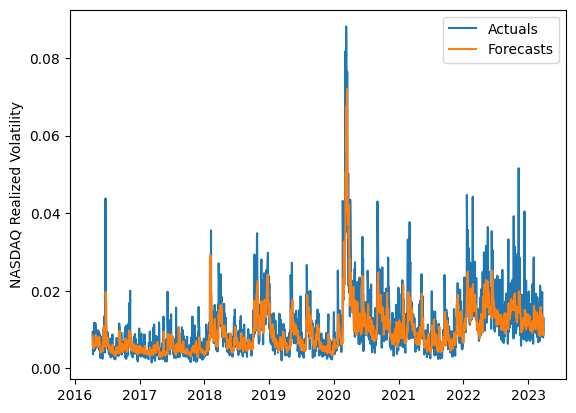

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 21
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/3)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,3:,:],[a[j*3:(j+1)*3]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1755,1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Streaminguitvoer ingekort tot de laatste 5000 regels.
1/1 [==============================] - 0s 23ms/step
Epoch 1/7
128/128 [==============================] - 4s 9ms/step - loss: 0.0015 - accuracy: 0.4323 - mean_absolute_error: 0.0350
Epoch 2/7
128/128 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 0.4166 - mean_absolute_error: 0.0300
Epoch 3/7
128/128 [==============================] - 1s 7ms/step - loss: 9.8324e-04 - accuracy: 0.2206 - mean_absolute_error: 0.0277
Epoch 4/7
128/128 [==============================] - 1s 7ms/step - loss: 0.0010 - accuracy: 0.2213 - mean_absolute_error: 0.0282
Epoch 5/7
128/128 [==============================] - 1s 7ms/step - loss: 9.4449e-04 - accuracy: 0.2999 - mean_absolute_error: 0.0272
Epoch 6/7
128/128 [==============================] - 1s 7ms/step - loss: 9.5027e-04 - accuracy: 0.2523 - mean_absolute_error: 0.0273
Epoch 7/7
1/1 [==============================] - 0s 26ms/step
Epoch 1/7
128/128 [===========================

In [ ]:
RMSE

[0.0038801616958373405,
 0.0036765013936048124,
 0.003803259595073079,
 0.004149640915235199,
 0.0036215680600220753,
 0.0036497339533110903,
 0.0035422088760673647,
 0.003604942701952774,
 0.0038012947606326595,
 0.004809724699879603,
 0.0036999537250319427,
 0.003608013694878936,
 0.0038652210076593014,
 0.0035708169519110848,
 0.0036180339075381194]

In [ ]:
Accuracy

[52.41190684872292,
 57.57845266337724,
 55.753192471387734,
 48.67949889843172,
 60.05381796952107,
 60.073339473436604,
 62.838521659844005,
 60.926643746754735,
 55.51868307064741,
 35.504632538881985,
 59.479992558537575,
 64.82371843882989,
 53.28777033872767,
 61.46705091036537,
 61.01991865298784]

In [ ]:
Quasilikelihood

[0.1352904781708327,
 0.11519567705068524,
 0.12190031489771068,
 0.14985307008866675,
 0.1090247102849726,
 0.10739175616534768,
 0.09833111738035012,
 0.10406230270552044,
 0.12296035140941272,
 0.20688232477610347,
 0.10965160291909588,
 0.09646779712187857,
 0.13140219015713317,
 0.1027949261201779,
 0.10413360181876888]

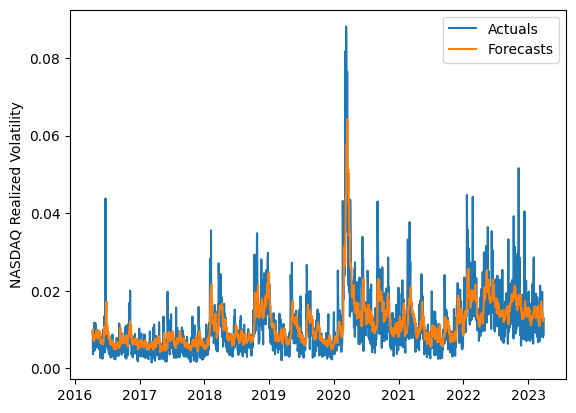

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 21
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/5)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,5:,:],[a[j*5:(j+1)*5]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1755,1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Streaminguitvoer ingekort tot de laatste 5000 regels.
1/1 [==============================] - 0s 21ms/step
Epoch 1/7
128/128 [==============================] - 3s 7ms/step - loss: 0.0013 - accuracy: 0.1972 - mean_absolute_error: 0.0327
Epoch 2/7
128/128 [==============================] - 1s 5ms/step - loss: 0.0011 - accuracy: 0.2712 - mean_absolute_error: 0.0289
Epoch 3/7
128/128 [==============================] - 1s 6ms/step - loss: 0.0010 - accuracy: 0.3041 - mean_absolute_error: 0.0287
Epoch 4/7
128/128 [==============================] - 1s 5ms/step - loss: 9.9141e-04 - accuracy: 0.1189 - mean_absolute_error: 0.0280
Epoch 5/7
128/128 [==============================] - 1s 5ms/step - loss: 9.6972e-04 - accuracy: 0.2164 - mean_absolute_error: 0.0277
Epoch 6/7
128/128 [==============================] - 1s 6ms/step - loss: 9.5668e-04 - accuracy: 0.1761 - mean_absolute_error: 0.0275
Epoch 7/7
1/1 [==============================] - 0s 19ms/step
Epoch 1/7
128/128 [===========================

In [ ]:
RMSE

[0.003743628965296432,
 0.003996785041872302,
 0.003698032073721633,
 0.00400590690771422,
 0.0037722286455260526,
 0.00377503399951819,
 0.0037338008935476744,
 0.003761396840406986,
 0.004179779424633174,
 0.0038027509366956036,
 0.0037781769581021326,
 0.003832622578569669,
 0.0037661858540596403,
 0.0049796961840003805,
 0.004345801935510466]

In [ ]:
Accuracy

[61.7891976098859,
 52.30876793803537,
 62.46797829986863,
 51.82447770758056,
 62.423371672118776,
 59.1816744907359,
 59.5543856220126,
 59.36160829714514,
 48.77193789088731,
 58.02853997093237,
 57.587815924256766,
 57.51514328722265,
 59.210493580644695,
 27.663470319296714,
 44.75654888317892]

In [ ]:
Quasilikelihood

[0.10797576856646342,
 0.13956793649376995,
 0.10484376776267816,
 0.1410387726109588,
 0.10777258355925885,
 0.11414540662744993,
 0.11332793195753542,
 0.11346040074031799,
 0.15291420665853037,
 0.11830519622147112,
 0.12056319715195124,
 0.11969401448752985,
 0.11385510523265151,
 0.25279802074832425,
 0.16971031257573999]

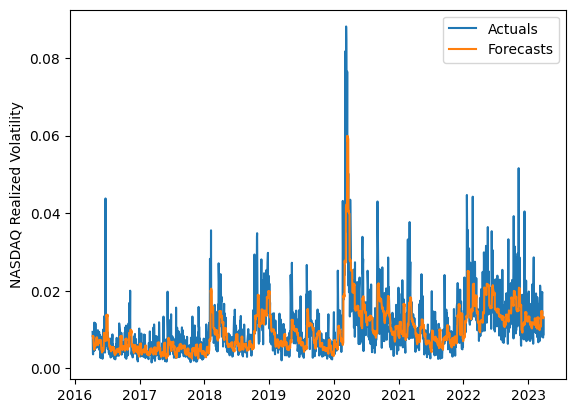

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 21
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/10)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,10:,:],[a[j*10:(j+1)*10]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1750,1)
  test=test[:1750]
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
128/128 [==============================] - 3s 5ms/step - loss: 0.0017 - accuracy: 0.0732 - mean_absolute_error: 0.0349
Epoch 2/7
128/128 [==============================] - 1s 5ms/step - loss: 0.0013 - accuracy: 0.0732 - mean_absolute_error: 0.0322
Epoch 3/7
128/128 [==============================] - 1s 5ms/step - loss: 0.0012 - accuracy: 0.0255 - mean_absolute_error: 0.0308
Epoch 4/7
128/128 [==============================] - 1s 5ms/step - loss: 0.0011 - accuracy: 0.0354 - mean_absolute_error: 0.0288
Epoch 5/7
128/128 [==============================] - 1s 5ms/step - loss: 0.0010 - accuracy: 0.0408 - mean_absolute_error: 0.0282
Epoch 6/7
128/128 [==============================] - 1s 5ms/step - loss: 9.9783e-04 - accuracy: 0.0290 - mean_absolute_error: 0.0282
Epoch 7/7
1/1 [==============================] - 0s 18ms/step
Epoch 1/7
128/128 [==============================] - 3s 7ms/step - loss: 0.0015 - accuracy: 0.0341 - mean_absolute_error: 0.0354
Epoch 2/7
128/128 [============

In [ ]:
RMSE

[0.0040520341408899875,
 0.004103463942179026,
 0.00415145463250988,
 0.004206044217898076,
 0.005081577077402124,
 0.0043758735962593324,
 0.004100247808583779,
 0.004455748168356088,
 0.004182059845024977,
 0.004836807298072922,
 0.004228836015420129,
 0.004134313459069437,
 0.0042679309894353675,
 0.00416390807346464,
 0.004278020951406661]

In [ ]:
Accuracy

[57.47755161042253,
 55.615951923185605,
 55.0267438418887,
 55.138546489373965,
 31.661322049857233,
 48.09744377648562,
 57.30265017890164,
 45.36420825795863,
 51.28130160173956,
 37.77222090710585,
 52.64114954692589,
 54.58103622225441,
 51.542084886761415,
 55.578380148785754,
 49.961371804440944]

In [ ]:
Quasilikelihood

[0.1263032618660819,
 0.1325326381516911,
 0.1346185673417003,
 0.1351554740598343,
 0.2326748768040923,
 0.16026137032802168,
 0.1278446268502741,
 0.17140365925453807,
 0.14781287251720365,
 0.20460000100010628,
 0.14309318679536523,
 0.1359863424723779,
 0.1469649588261572,
 0.13427977148593895,
 0.15334618398852248]

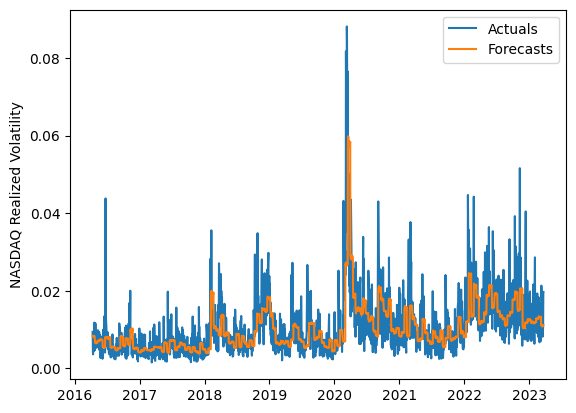

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:1750], test)
plt.plot(df_for_date["Date"][:1750], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 21
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/22)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,22:,:],[a[j*22:(j+1)*22]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1738,1)
  test=test[:1738]
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
128/128 [==============================] - 3s 5ms/step - loss: 0.0016 - accuracy: 0.1196 - mean_absolute_error: 0.0353
Epoch 2/7
128/128 [==============================] - 1s 5ms/step - loss: 0.0012 - accuracy: 0.0297 - mean_absolute_error: 0.0309
Epoch 3/7
128/128 [==============================] - 1s 5ms/step - loss: 0.0011 - accuracy: 0.0233 - mean_absolute_error: 0.0289
Epoch 4/7
128/128 [==============================] - 1s 5ms/step - loss: 0.0010 - accuracy: 0.0098 - mean_absolute_error: 0.0281
Epoch 5/7
128/128 [==============================] - 1s 5ms/step - loss: 9.8454e-04 - accuracy: 0.0079 - mean_absolute_error: 0.0278
Epoch 6/7
128/128 [==============================] - 1s 5ms/step - loss: 9.5216e-04 - accuracy: 0.0165 - mean_absolute_error: 0.0275
Epoch 7/7
1/1 [==============================] - 0s 21ms/step
Epoch 1/7
128/128 [==============================] - 3s 5ms/step - loss: 0.0015 - accuracy: 0.0160 - mean_absolute_error: 0.0347
Epoch 2/7
128/128 [========

In [ ]:
RMSE

[0.004775325393392424,
 0.00483824628026447,
 0.004756212696775386,
 0.00465181278631425,
 0.005166497469512371,
 0.004870447223337773,
 0.005340559366892624,
 0.004832154003790602,
 0.004728795282972934,
 0.0056646765065714085,
 0.0046358397685432,
 0.004699565913399188,
 0.004784405511541271,
 0.004760091789879415,
 0.004729051854693775]

In [ ]:
Accuracy

[50.58282723709373,
 47.114672633146405,
 49.449896128480844,
 51.48885322625336,
 41.765994952530015,
 49.804910529644474,
 34.98702037491196,
 47.97106168419063,
 51.587023430534096,
 31.90935198435776,
 54.93146173727739,
 53.58002775409335,
 49.147016915920915,
 52.827688655471135,
 49.969024352722855]

In [ ]:
Quasilikelihood

[0.1635555012673174,
 0.1752772402779418,
 0.16778308506223938,
 0.15909572372734537,
 0.1971154309372526,
 0.16764341490783818,
 0.22536226364391487,
 0.1736869645093551,
 0.16008594129413953,
 0.23892205831763316,
 0.15218080205846626,
 0.15466786086731826,
 0.16772162979469193,
 0.1590067311310245,
 0.16450047027637318]

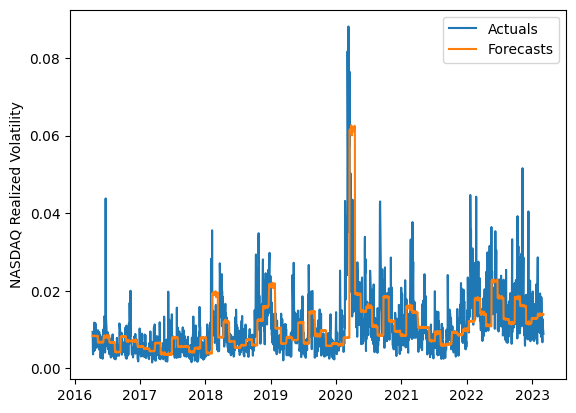

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:1738], test)
plt.plot(df_for_date["Date"][:1738], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])